In [1]:
import os

import numpy as np

os.chdir('/Users/edwardchiu/Desktop/projects/baha-anime-analysis')
os.getcwd()

'/Users/edwardchiu/Desktop/projects/baha-anime-analysis'

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import matplotlib.pyplot as plt

In [86]:
df_anime = pd.read_csv('data/all_anime.csv')
df_anime.head()

,name,thumbnail,total_view,total_episode,avg_view,link,score,score_count,first_launched_date,author,director,agent,animator,types
0,青之壬生浪,https://p2.bahamut.com.tw/B/ACG/c/23/000013552...,23000.0,3,7666.666667,https://ani.gamer.com.tw/animeRef.php?sn=113677,4.8,285.0,2024-10-19,安田剛士,羽原久美子,曼迪,MAHO FILM,"['青春', '勵志', '歷史']"
1,香蕉喵遊世界,https://p2.bahamut.com.tw/B/ACG/c/00/000014150...,16000.0,4,4000.000000,https://ani.gamer.com.tw/animeRef.php?sn=113633,4.6,124.0,2024-10-14,Q-LiA,矢立恭,Ani-One,TMS Entertainment（第6工作室）×Lesprit,"['溫馨', '悠閒', '泡麵番', '闔家觀賞']"
2,平凡職業造就世界最強 第三季,https://p2.bahamut.com.tw/B/ACG/c/96/000012709...,301000.0,3,100333.333333,https://ani.gamer.com.tw/animeRef.php?sn=113635,4.9,3575.0,2024-10-14,白米良,岩永彰,木棉花,asread.,"['動作', '冒險', '奇幻', '異世界', '魔法']"
3,香格里拉・開拓異境～糞作獵手挑戰神作～ 第二季,https://p2.bahamut.com.tw/B/ACG/c/12/000013861...,492000.0,4,123000.000000,https://ani.gamer.com.tw/animeRef.php?sn=113665,5.0,5647.0,2024-10-13,硬梨菜、不二涼介,窪岡俊之、池下博紀,木棉花,C2C,"['動作', '冒險', '奇幻']"
4,魔王 2099,https://p2.bahamut.com.tw/B/ACG/c/43/000013124...,220000.0,4,55000.000000,https://ani.gamer.com.tw/animeRef.php?sn=113662,4.9,2779.0,2024-10-13,紫大悟,安藤良,木棉花,J.C.STAFF,"['動作', '奇幻', '魔法', '科幻', '職場']"


In [87]:
df_anime['first_launched_date'] = pd.to_datetime(df_anime['first_launched_date'])
df_anime['first_launched_date'] = df_anime['first_launched_date'].astype(int)

In [88]:
df_anime['total_view'] = df_anime['total_view'].fillna(df_anime['total_view'].min())
df_anime['score'] = df_anime['score'].fillna(df_anime['score'].min())

In [89]:
scaler = StandardScaler()
df_anime[['scaled_launch', 'scaled_score']] = (
    scaler.fit_transform(df_anime[['first_launched_date', 'score']]))
df_anime[['scaled_launch', 'total_view', 'scaled_score']].describe()

,scaled_launch,total_view,scaled_score
count,1.730000e+03,1.730000e+03,1.730000e+03
mean,3.285747e-16,1.103011e+06,2.854492e-16
std,1.000289e+00,2.289312e+06,1.000289e+00
min,-5.421105e+00,1.449000e+03,-5.901117e+00
25%,-3.356732e-01,5.500000e+04,-2.311613e-01
50%,3.152282e-01,2.950000e+05,3.003970e-01
75%,7.081750e-01,1.146500e+06,6.547692e-01
max,1.039591e+00,3.224500e+07,8.319553e-01


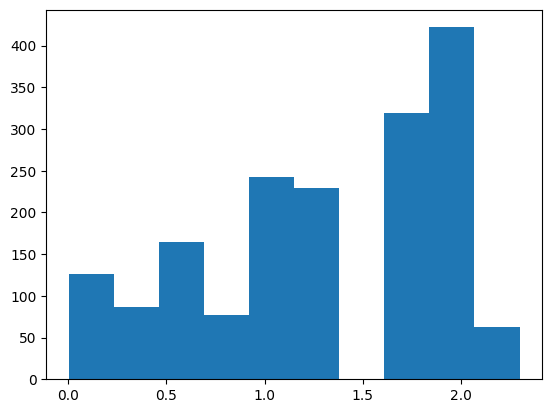

In [90]:
plt.hist(np.exp(df_anime['scaled_score']))
plt.show()

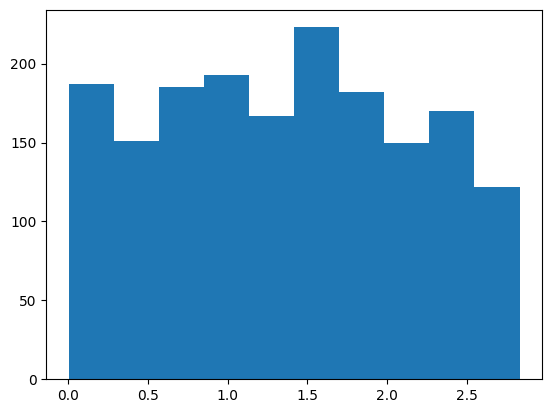

In [91]:
plt.hist(np.exp(df_anime['scaled_launch']))
plt.show()

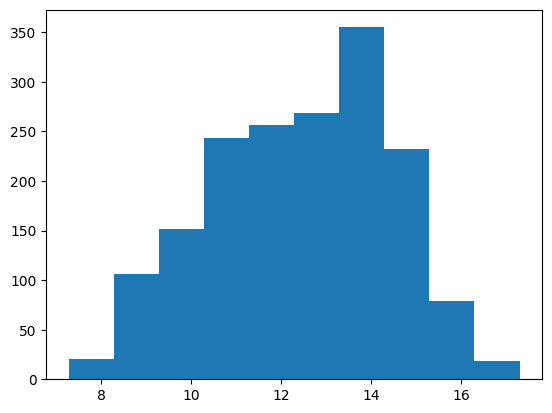

In [92]:
plt.hist(np.log(df_anime['total_view']))
plt.show()

In [93]:
df_anime['scaled_launch'] = np.exp(df_anime['scaled_launch'])
df_anime['scaled_score'] = np.exp(df_anime['scaled_score'])
df_anime['scaled_view'] = np.log(df_anime['total_view'])
df_anime[['scaled_launch', 'scaled_view', 'scaled_score']].describe()

,scaled_launch,scaled_view,scaled_score
count,1730.000000,1730.000000,1730.000000
mean,1.364972,12.430130,1.290792
std,0.791470,1.974004,0.610549
min,0.004422,7.278629,0.002736
25%,0.714857,10.915088,0.793611
50%,1.370572,12.594725,1.350395
75%,2.030283,13.952224,1.924698
max,2.828061,17.288874,2.297807


In [94]:
scaler = MinMaxScaler()
df_anime[['scaled_launch', 'scaled_view', 'scaled_score']] = scaler.fit_transform(
    df_anime[['scaled_launch', 'scaled_view', 'scaled_score']])
df_anime[['scaled_launch', 'scaled_view', 'scaled_score']].describe()

,scaled_launch,scaled_view,scaled_score
count,1730.000000,1730.000000,1730.000000
mean,0.481843,0.514623,0.561227
std,0.280302,0.197198,0.266026
min,0.000000,0.000000,0.000000
25%,0.251602,0.363274,0.344597
50%,0.483826,0.531066,0.587197
75%,0.717464,0.666677,0.837430
max,1.000000,1.000000,1.000000


In [99]:
df_anime[['scaled_launch2', 'scaled_view2', 'scaled_score2']] = scaler.fit_transform(
    df_anime[['first_launched_date', 'total_view', 'score']])
df_anime[['scaled_launch2', 'scaled_view2', 'scaled_score2']].describe()

,scaled_launch2,scaled_view2,scaled_score2
count,1730.000000,1730.000000,1730.000000
mean,0.839090,0.034164,0.876437
std,0.154827,0.071001,0.148564
min,0.000000,0.000000,0.000000
25%,0.787134,0.001661,0.842105
50%,0.887882,0.009104,0.921053
75%,0.948703,0.035513,0.973684
max,1.000000,1.000000,1.000000


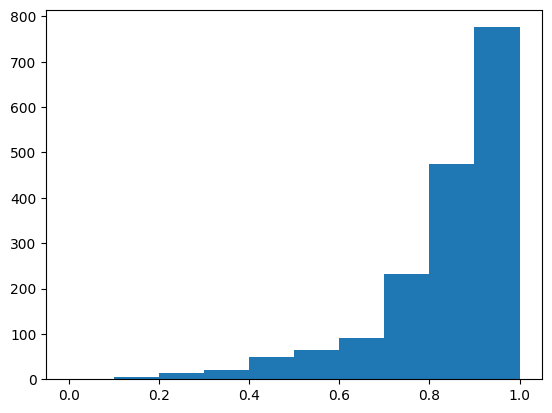

In [100]:
plt.hist(df_anime['scaled_launch2'])
plt.show()

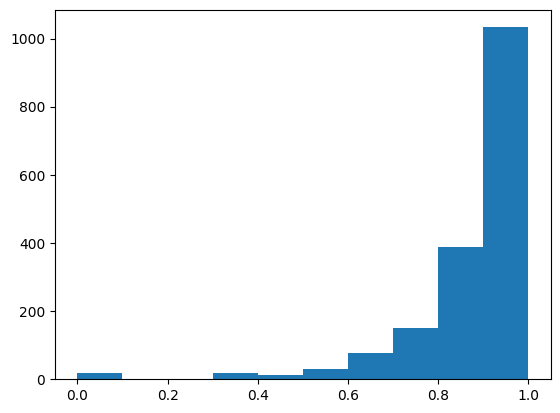

In [101]:
plt.hist(df_anime['scaled_score2'])
plt.show()

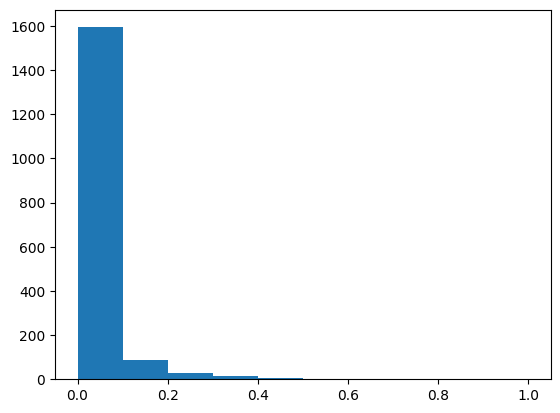

In [102]:
plt.hist(df_anime['scaled_view2'])
plt.show()

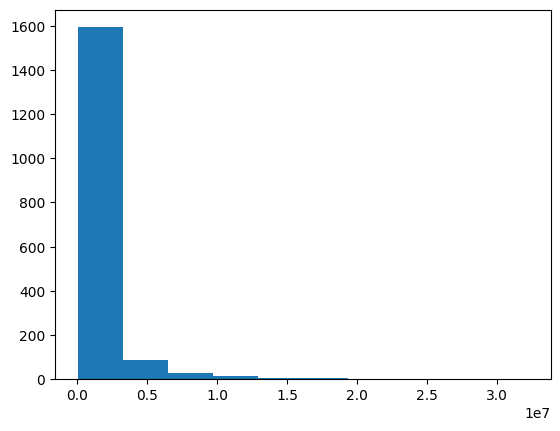

In [105]:
plt.hist(df_anime['total_view'])
plt.show()

In [106]:
# Function to compute Jaccard similarity
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

In [107]:
# Create an empty list to store the results
similarity_matrix = np.zeros((len(df_anime), len(df_anime)))
similarity_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [108]:
for r in range(len(df_anime)):
    for c in range(r + 1):
        if r == c:
            similarity_matrix[r, c] = float('-inf')
        else:
            similarity = jaccard_similarity(set(df_anime.iloc[r]['types']), set(df_anime.iloc[c]['types']))
            similarity_matrix[r, c] = similarity
            similarity_matrix[c, r] = similarity

In [109]:
similarity_df = pd.DataFrame(similarity_matrix, index=df_anime['name'], columns=df_anime['name'])

In [166]:
# Specify the anime for which you want to find the top 5 similar animes
target_anime = ['鬼滅之刃 竈門炭治郎 立志篇', '咒術迴戰']
parameters = ['scaled_score']

# Get the row corresponding to the target anime
target_similarities = similarity_df.loc[:, target_anime]

scaled_metrics = df_anime.loc[:, ['name', 'scaled_launch', 'scaled_view', 'scaled_score']]
scaled_metrics = scaled_metrics.set_index('name')

target_similarities.loc[:, ['scaled_launch', 'scaled_view', 'scaled_score']] = scaled_metrics

target_similarities['main_metic'] = target_similarities[target_anime + parameters].mean(axis=1)

# Exclude the similarity with itself (which is always 1.0)
# target_similarities = target_similarities.drop(target_anime)
# 
# Sort the similarities in descending order and get the top 5 most similar animes
top_5_similar_animes = target_similarities.sort_values('main_metic', ascending=False).head(5)

# Print the top 5 similar animes
top_5_similar_animes


name,鬼滅之刃 竈門炭治郎 立志篇,咒術迴戰,scaled_launch,scaled_view,scaled_score,main_metic
name,,,,,,
BLEACH 死神 千年血戰篇-相剋譚-,1.000000,0.565217,0.994485,0.582164,1.00000,0.855072
BLEACH 死神 千年血戰篇-訣別譚-,1.000000,0.565217,0.830852,0.724778,0.83743,0.800883
咒術迴戰 第二季,0.565217,1.000000,0.830195,0.897972,0.83743,0.800883
鬼滅之刃 遊郭篇,1.000000,0.565217,0.660634,0.891440,0.83743,0.800883
BLEACH 死神 千年血戰篇,1.000000,0.565217,0.746465,0.758238,0.83743,0.800883


In [160]:
similarity_df[target_anime]

name,進擊的巨人,咒術迴戰
name,,
青之壬生浪,0.238095,0.185185
香蕉喵遊世界,0.192308,0.156250
平凡職業造就世界最強 第三季,0.409091,0.370370
香格里拉・開拓異境～糞作獵手挑戰神作～ 第二季,0.529412,0.391304
魔王 2099,0.318182,0.346154
...,...,...
城市獵人 2,0.411765,0.304348
妙手小廚師,0.217391,0.172414
妖獸都市 1987 劇場版,0.368421,0.523810


In [142]:
pd.DataFrame(similarity_matrix[:, target_index],
             index=df_anime['name'], columns=target_anime)

,和山田談場 Lv999 的戀愛,妙廟美少女
name,,
青之壬生浪,0.333333,0.333333
香蕉喵遊世界,0.250000,0.250000
平凡職業造就世界最強 第三季,0.250000,0.250000
香格里拉・開拓異境～糞作獵手挑戰神作～ 第二季,0.333333,0.333333
魔王 2099,0.277778,0.277778
...,...,...
城市獵人 2,0.636364,0.636364
妙手小廚師,0.294118,0.294118
妖獸都市 1987 劇場版,0.333333,0.333333


In [ ]:
top_5_similar_animes

In [ ]:
df_anime[df_anime['name'] == '格萊普尼爾']

In [ ]:
df_anime['first_launched_date'] = pd.to_datetime(df_anime['first_launched_date'])

In [ ]:
df_anime['first_launched_date'].astype(int)